# Algebraic differentiators: Examples from the AT-Automatisierungstechnik paper
This notebook includes all the examples discussed in the paper ...
You need the following python packages: ---

## Example 1: Impulse and step responses

Computing and ploting the impulse and step responses of an algebraic differentiator

The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.100000
Sampling period in s: 0.010000
Polynomial degree: 0
Estimation delay in s: 0.050000
Cutoff Frequency in rad/s: 68.534675
Cutoff Frequency in Hz: 10.907632
Discrete window length: 10


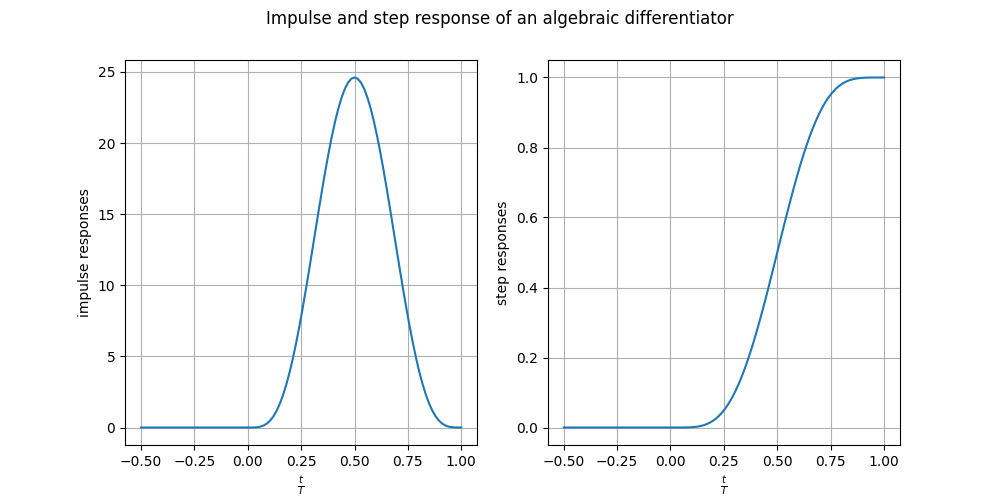

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from algebraicDifferentiator import AlgebraicDifferentiator
import numpy as np

# Create an instance of the class
diffA = AlgebraicDifferentiator(N=0,alpha=4.,beta=4,T=0.1)
# Evaluate the impulse and step responses for a given time range t
t = np.linspace(-0.05,0.1,100)
order_der = 0 # Order of derivative of impulse res.
g = diffA.evalKernelDer(t,order_der)
h = diffA.get_stepResponse(t)

# Plot the impulse and step response of the filter
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=True, figsize=(10, 5))
fig.suptitle("Impulse and step response of an algebraic differentiator")
ax[0].plot(t/diffA.get_T(),g)
ax[1].plot(t/diffA.get_T(),h)
ax[0].set_xlabel(r"$\frac{t}{T}$")
ax[1].set_xlabel(r"$\frac{t}{T}$")
ax[0].set_ylabel(r"impulse responses")
ax[1].set_ylabel(r"step responses")
ax[0].grid()
plt.grid()
plt.show()


## Example 2: Specifying frequency-domain properties


/tmp/ipykernel_358849/1160886454.py:20: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(lA),label=r"approximation")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.020000
Sampling period in s: 0.010000
Polynomial degree: 0
Estimation delay in s: 0.010000
Cutoff Frequency in rad/s: 122.474487
Cutoff Frequency in Hz: 19.492420
Discrete window length: 2
0.02


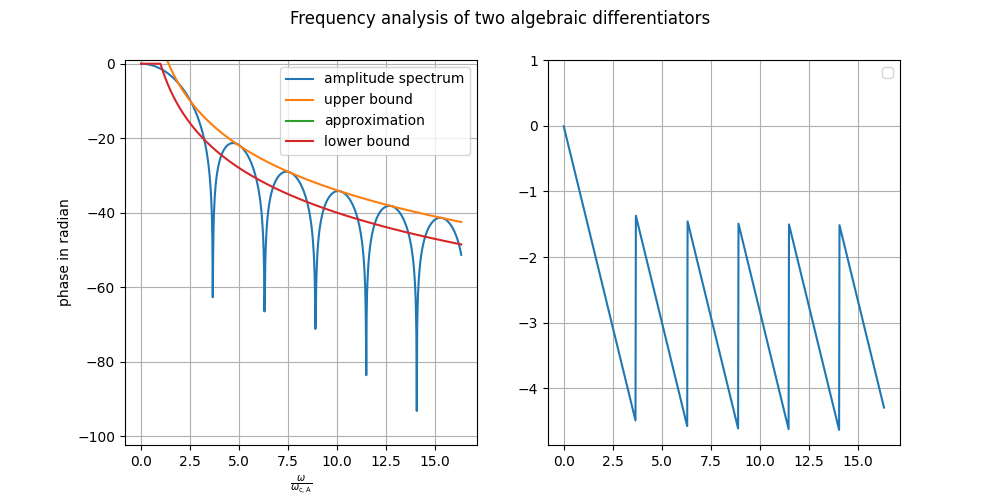

In [2]:
# Create an instance of the class
diffA = AlgebraicDifferentiator(N=0,alpha=1.,beta=1,T=None,wc=100)
# Compute amplitude spectrum of the differentiator
omega = np.linspace(1,2000,8*10**2)
ampA,phaseA = diffA.get_ampAndPhaseFilter(omega)
# Get upper and lower bound and the approximation of the amplitude spectrum
uA, lA, mA = diffA.get_asymptotesAmpFilter(omega)
# Get filter window length
T = diffA.get_T()

print(T)

# Plot results
## PLEASE NOTE: Python will give a warning in the conversion to dB for the differentiato A
## since the amplitude spectrum reaches zero!
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=False, figsize=(10, 5))
fig.suptitle("Frequency analysis of two algebraic differentiators")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(ampA),label=r"amplitude spectrum")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(uA),label=r"upper bound")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(lA),label=r"approximation")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(mA),label=r"lower bound")
ax[0].set_ylim(top=1)
ax[0].set_xlabel(r"$\frac{\omega}{\omega_{\mathrm{c,A}}}$")
ax[0].set_ylabel(r"amplitudes in dB")
ax[0].legend()
ax[0].grid()

ax[1].plot(omega/diffA.get_cutoffFreq(),phaseA)
ax[0].set_ylabel(r"phase in radian")
ax[1].set_ylim(top=1)
ax[1].legend()
plt.grid()
plt.show()

data = np.c_[omega,20*np.log10(ampA),20*np.log10(uA),20*np.log10(mA),phaseA]
np.savetxt('spectra.dat', data, comments='',header='w,A,u,m,p',fmt='%.3e',delimiter=',')

## Example 3: Delay-free differentiator

The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.040000
Sampling period in s: 0.010000
Polynomial degree: 1
Estimation delay in s: 0.011056
Cutoff Frequency in rad/s: 110.160133
Cutoff Frequency in Hz: 17.532530
Discrete window length: 4
The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.040000
Sampling period in s: 0.010000
Polynomial degree: 1
Estimation delay in s: 0.011056
Cutoff Frequency in rad/s: 110.160133
Cutoff Frequency in Hz: 17.532530
Discrete window length: 4
0.02


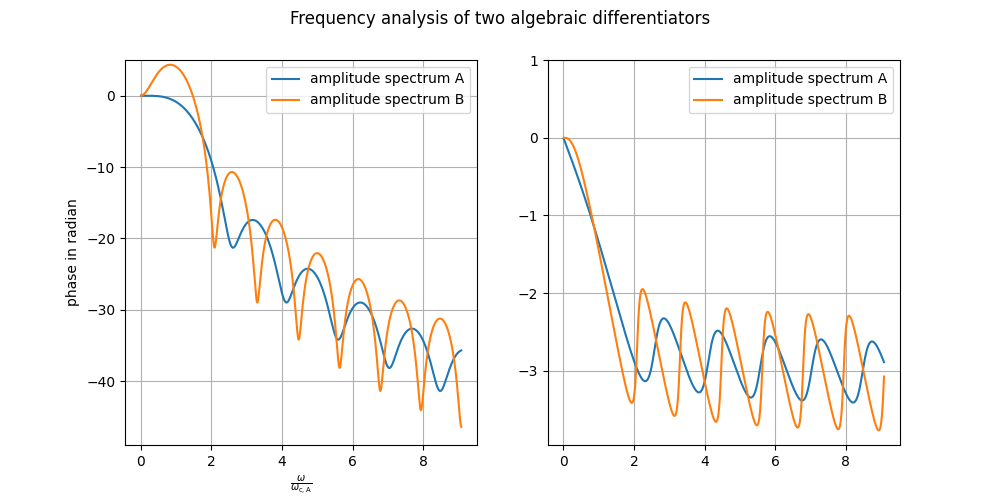

In [3]:
# Create an instance of the class with delay
diffA = AlgebraicDifferentiator(N=1,alpha=1.,beta=1,T=None,wc=100)
# Create an instance of the class without delay
diffB = AlgebraicDifferentiator(N=1,alpha=1.,beta=1,T=None,wc=100)
diffB.set_theta(1,False)

# Compute amplitude spectrum of the differentiator
omega = np.linspace(1,1000,8*10**2)
ampA,phaseA = diffA.get_ampAndPhaseFilter(omega)
ampB,phaseB = diffB.get_ampAndPhaseFilter(omega)


print(T)

# Plot results
## PLEASE NOTE: Python will give a warning in the conversion to dB for the differentiato A
## since the amplitude spectrum reaches zero!
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=False, figsize=(10, 5))
fig.suptitle("Frequency analysis of two algebraic differentiators")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(ampA),label=r"amplitude spectrum A")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(ampB),label=r"amplitude spectrum B")
ax[0].set_ylim(top=5)
ax[0].set_xlabel(r"$\frac{\omega}{\omega_{\mathrm{c,A}}}$")
ax[0].set_ylabel(r"amplitudes in dB")
ax[0].legend()
ax[0].grid()

ax[1].plot(omega/diffA.get_cutoffFreq(),phaseA,label=r"amplitude spectrum A")
ax[1].plot(omega/diffA.get_cutoffFreq(),phaseB,label=r"amplitude spectrum B")
ax[0].set_ylabel(r"phase in radian")
ax[1].set_ylim(top=1)
ax[1].legend()
plt.grid()
plt.show()

data = np.c_[omega,20*np.log10(ampA),phaseA,20*np.log10(ampB),phaseB]
np.savetxt('spectra_no_delay.dat', data, comments='',header='w,A_A,p_A,A_B,p_B',fmt='%.3e',delimiter=',')

## Example 4: Exact annihilation of a known frequency

The differentiator has the parameters:
Alpha: 2.000000
Beta: 2.000000
Window length in s: 0.181900
Sampling period in s: 0.010000
Polynomial degree: 0
Estimation delay in s: 0.090950
Cutoff Frequency in rad/s: 21.522060
Cutoff Frequency in Hz: 3.425342
Discrete window length: 18


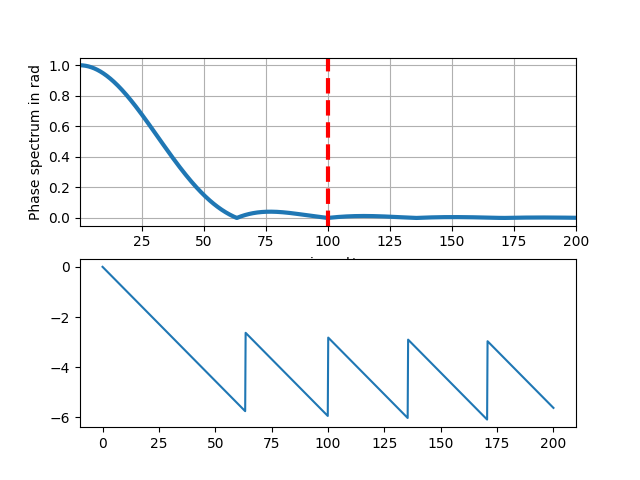

In [4]:
import mpmath as mp

# Create an instance of the class with delay
w_0 = 100
alpha = 2
k = 2 # Choose the k-th zero of the Bessel function
jk = float(mp.besseljzero(alpha+0.5,k))
T = 2*jk/w_0
algDiff = AlgebraicDifferentiator(N=0,alpha=alpha,beta=alpha,
                                  T=T)


# Evaluate Fourier transform
omega = np.linspace(0,200,1000)
amp,phase = algDiff.get_ampAndPhaseFilter(omega)

# Plot results
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=False)
l = 3
ax[0].plot(omega,abs(amp),linewidth=l)
ax[0].set_xlabel(r"$\omega$ in rad/s")
ax[0].set_ylabel(r"Amplitude spectrum")
ax[0].set_xlim((omega[1],omega[-1]))
v = ax[0].axvline(x=w_0)
v.set_linestyle('--')
v.set_color('r')
v.set_linewidth(l)
ax[0].grid()

ax[1].plot(omega,phase)
ax[0].set_xlabel(r"$\omega$ in rad/s")
ax[0].set_ylabel(r"Phase spectrum in rad")
plt.show()

data = np.c_[omega,abs(amp),phase]
np.savetxt('spectra_no_annihilation.dat', data, comments='',header='w,A,p',fmt='%.3e',delimiter=',')

## Example: Specifying relative attenuation

In [5]:
# Create an instance of the class with delay
wc = 90
kn = 10**(-3)
ts = 0.01
wN = np.pi/ts
der_order = 1
alpha = np.log(kn)/np.log(wc/wN)+der_order-1
algDiff = AlgebraicDifferentiator(N=0,alpha=alpha,beta=alpha,
                                  T=None,wc=wc,ts=ts)

The differentiator has the parameters:
Alpha: 5.525805
Beta: 5.525805
Window length in s: 0.100000
Sampling period in s: 0.010000
Polynomial degree: 0
Estimation delay in s: 0.050000
Cutoff Frequency in rad/s: 90.972608
Cutoff Frequency in Hz: 14.478740
Discrete window length: 10


## Example 5: Effects of normalization factor in discretization

The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.100000
Sampling period in s: 0.010000
Polynomial degree: 1
Estimation delay in s: 0.027639
Cutoff Frequency in rad/s: 44.064053
Cutoff Frequency in Hz: 7.013012
Discrete window length: 10
The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.100000
Sampling period in s: 0.010000
Polynomial degree: 1
Estimation delay in s: 0.027639
Cutoff Frequency in rad/s: 44.064053
Cutoff Frequency in Hz: 7.013012
Discrete window length: 10


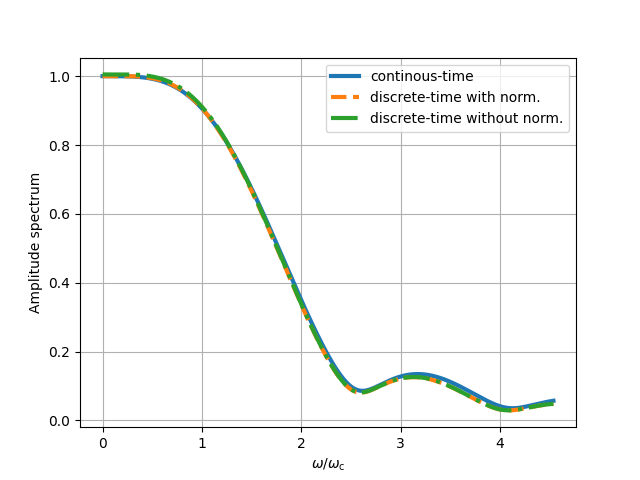

In [6]:
import mpmath as mp

# Create an instance of the class with delay
alpha = 1
ts = 0.01
T = 10*ts
N = 1
diffA = AlgebraicDifferentiator(N=N,alpha=alpha,beta=alpha,
                                  T=T,ts=ts)
diffN = AlgebraicDifferentiator(N=N,alpha=alpha,beta=alpha,
                                  T=T,ts=ts,corr=False)


# Evaluate Fourier transform
omega = np.linspace(0,200,1000)
method = 'mid-point'
d = 0
ampA_C,phaseA_C = diffA.get_ampAndPhaseFilter(omega)
ampA_D,phaseA_D = diffA.get_ampSpectrumDiscreteFilter(omega, d, method=method)
ampN_D,phaseN_D = diffN.get_ampSpectrumDiscreteFilter(omega, d, method=method)
#ampA_C = ampA_C*omega
ampA_D = ampA_D/(1j*omega)**d
ampN_D = ampN_D/(1j*omega)**d

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=1,sharex=False)
l = 3
ax.plot(omega/diffA.get_cutoffFreq(),abs(ampA_C),linewidth=l,label='continous-time')
ax.plot(omega/diffA.get_cutoffFreq(),abs(ampA_D),'--',linewidth=l,label='discrete-time with norm.')
ax.plot(omega/diffA.get_cutoffFreq(),abs(ampN_D),'-.',linewidth=l,label='discrete-time without norm.')
ax.set_xlabel(r"$\omega/\omega_{\mathrm{c}}$")
ax.set_ylabel(r"Amplitude spectrum")
ax.grid()
ax.legend()
plt.show()

data = np.c_[omega/diffA.get_cutoffFreq(),abs(ampA_C),abs(ampA_D),abs(ampN_D)]
np.savetxt('spectra_normalisation'+str(N)+'.dat', data, comments='',header='w,A_C,A_D,N_D',fmt='%.3e',delimiter=',')

## Example: Discretization error

The differentiator has the parameters:
Alpha: 7.000000
Beta: 7.000000
Window length in s: 0.020000
Sampling period in s: 0.001000
Polynomial degree: 0
Estimation delay in s: 0.010000
Cutoff Frequency in rad/s: 563.285587
Cutoff Frequency in Hz: 89.649685
Discrete window length: 20
1.5807988926736738e-10


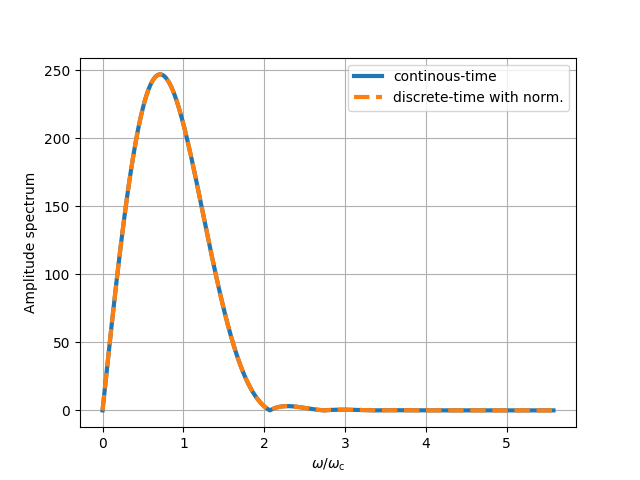

In [7]:
# Create an instance of the class with delay
alpha = 7
beta = 7
ts = 0.001
T = 20*ts
N = 0
diffA = AlgebraicDifferentiator(N=N,alpha=alpha,beta=beta,
                                  T=T,ts=ts)
# Compute discretization error
Omega = np.pi/ts
J = diffA.get_discretizationError(1,Omega)
print(J)

# Evaluate Fourier transform
omega = np.linspace(0,Omega,1000)
method = 'mid-point'
d = 1
ampA_C,_ = diffA.get_ampAndPhaseFilter(omega)
ampA_D,_ = diffA.get_ampSpectrumDiscreteFilter(omega, d, method=method)
ampA_C = ampA_C*(omega)**d
ampA_D = ampA_D
# Plot results
fig, ax = plt.subplots(nrows=1, ncols=1,sharex=False)
l = 3
ax.plot(omega/diffA.get_cutoffFreq(),abs(ampA_C),linewidth=l,label='continous-time')
ax.plot(omega/diffA.get_cutoffFreq(),abs(ampA_D),'--',linewidth=l,label='discrete-time with norm.')
#ax.set_ylim([0,2])
ax.set_xlabel(r"$\omega/\omega_{\mathrm{c}}$")
ax.set_ylabel(r"Amplitude spectrum")
ax.grid()
ax.legend()
plt.show()

## Example: Estimation of the first order derivative of a disturbed signal
### Simulated signal
The derivative of a signal $y:t\rightarrow y(t)$ without any disturbance is estimated: The first differentiator has a delay. The second differentiator is parametrized for a delay free approximation.

30.620773372709927
The differentiator has the parameters:
Alpha: 3.351619
Beta: 3.351619
Window length in s: 0.280000
Sampling period in s: 0.020000
Polynomial degree: 0
Estimation delay in s: 0.140000
Cutoff Frequency in rad/s: 21.072562
Cutoff Frequency in Hz: 3.353802
Discrete window length: 14
7.900108425267886e-06


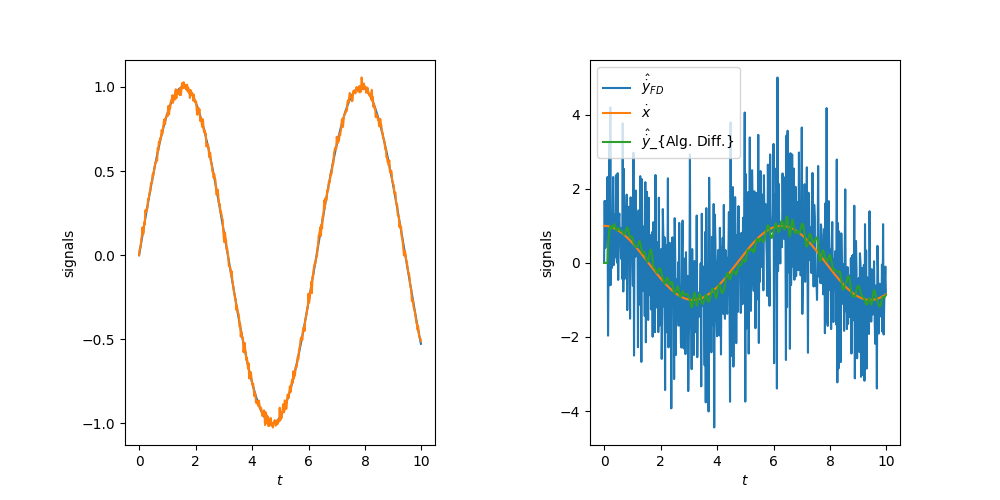

In [9]:
import mpmath as mp

#######################################
# Compute signals and its derivatives
#######################################
ts = 0.02
t = np.arange(0,10,ts)
a0 = 1
w0 = 1
x = a0*np.sin(w0*t)
dx = a0*w0*np.cos(w0*t)
wr = 100
d0 = 0
d = d0*np.sin(wr*t)
eta = np.random.normal(0,0.02,len(t))
      
y = x+eta+d
print(10*np.log10(np.sum(y**2)/np.sum(eta**2)))

#######################################
# Desing differentiator and estimate
#######################################
wc = 20
kn = 10**(-3)
wN = np.pi/ts
der_order = 1
alpha = np.log(kn)/np.log(wc/wN)+der_order-1
#alpha = 3
algDiff = AlgebraicDifferentiator(N=0,alpha=alpha,beta=alpha,
                                  T=None, ts=ts,wc=wc)
dyApp = algDiff.estimateDer(1,y)
J = algDiff.get_discretizationError(1,np.pi/ts)
print(J)
#######################################
# Plot results
#######################################
plt.close('all')
fig, (fy,fdy) = plt.subplots(nrows=1, ncols=2,sharex=True, figsize=(10, 5))
fig.subplots_adjust( wspace=0.5)
fy.plot(t,x,label=r'$x$')
fy.plot(t,y,label=r'y')
fy.set_xlabel(r'$t$')
fy.set_ylabel(r'signals')

yFD = y*0
yFD[1:] = (y[1:]-y[:-1])/ts
fdy.plot(t,yFD,label=r'$\hat{\dot{y}}_{FD}$')
fdy.plot(t,dx,label=r'$\dot{x}$')
fdy.plot(t,dyApp,label=r'$\hat{\dot{y}}$_{Alg. Diff.}')
fdy.set_xlabel(r'$t$')
fdy.set_ylabel(r'signals')

plt.legend()

plt.show()

data = np.c_[t,x,dx,y,dyApp,yFD]
np.savetxt('estimated_der.dat', data, comments='',header='t,x,dx,y,yApp,yFD',fmt='%.3e',delimiter=',')

31.010716640056522
The differentiator has the parameters:
Alpha: 3.351619
Beta: 3.351619
Window length in s: 0.280000
Sampling period in s: 0.020000
Polynomial degree: 0
Estimation delay in s: 0.140000
Cutoff Frequency in rad/s: 21.072562
Cutoff Frequency in Hz: 3.353802
Discrete window length: 14


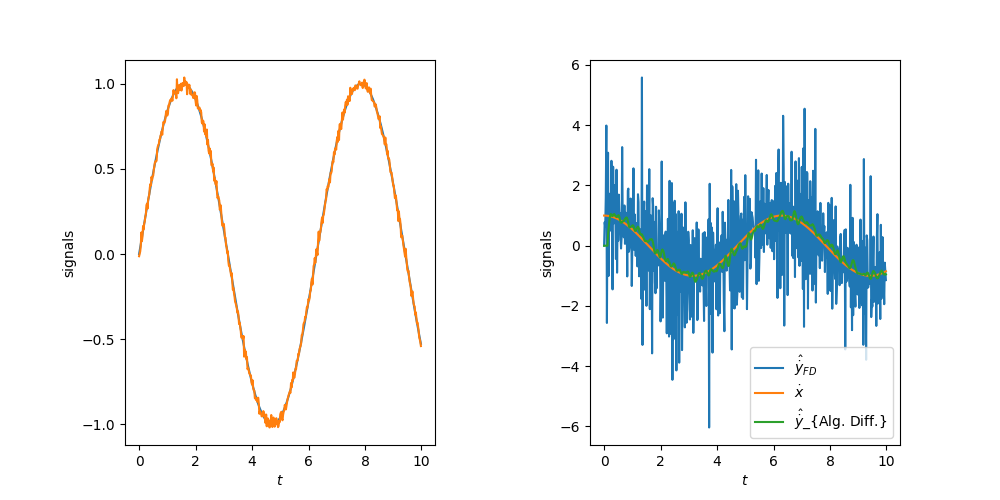

In [10]:
import mpmath as mp

#######################################
# Compute signals and its derivatives
#######################################
ts = 0.02
t = np.arange(0,10,ts)
a0 = 1
w0 = 1
x = a0*np.sin(w0*t)
dx = a0*w0*np.cos(w0*t)
wr = 100
d0 = 0
d = d0*np.sin(wr*t)
eta = np.random.normal(0,0.02,len(t))
print(10*np.log10(np.sum(y**2)/np.sum(eta**2)))
      
y = x+eta+d

#######################################
# Desing differentiator and estimate
#######################################
wc = 20
kn = 10**(-3)
wN = np.pi/ts
der_order = 1
alpha = np.log(kn)/np.log(wc/wN)+der_order-1
#alpha = 3
algDiff = AlgebraicDifferentiator(N=0,alpha=alpha,beta=alpha,
                                  T=None, ts=ts,wc=wc)
dyApp = algDiff.estimateDer(1,y)

#######################################
# Plot results
#######################################
plt.close('all')
fig, (fy,fdy) = plt.subplots(nrows=1, ncols=2,sharex=True, figsize=(10, 5))
fig.subplots_adjust( wspace=0.5)
fy.plot(t,x,label=r'$x$')
fy.plot(t,y,label=r'y')
fy.set_xlabel(r'$t$')
fy.set_ylabel(r'signals')

yFD = y*0
yFD[1:] = (y[1:]-y[:-1])/ts
fdy.plot(t,yFD,label=r'$\hat{\dot{y}}_{FD}$')
fdy.plot(t,dx,label=r'$\dot{x}$')
fdy.plot(t,dyApp,label=r'$\hat{\dot{y}}$_{Alg. Diff.}')
fdy.set_xlabel(r'$t$')
fdy.set_ylabel(r'signals')

plt.legend()

plt.show()

data = np.c_[t,x,dx,y,dyApp,yFD]
np.savetxt('estimated_der.dat', data, comments='',header='t,x,dx,y,yApp,yFD',fmt='%.3e',delimiter=',')

## Outlayer detection


In [67]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real
def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

In [243]:
ts = 0.001
# Create an instance of the class without delay
T = 0.005
a = 4
N = 1
diffA = AlgebraicDifferentiator(N=N,alpha=a,beta=a,T=T,ts=ts)
def theta_T(tau):
    return 1-2/T*tau
theta = theta_T(-ts)
diffA.set_theta(theta,False)
diffA.printParam()
#J = diffA.get_discretizationError(0,np.pi/ts)
#print('J',J)

plt.close('all')
# Generate signals
t = np.arange(0,15,ts)
x = np.sin(10*t)*np.cos(15*t)+np.tanh(0.1*t)

x_fault = x.copy()
i_fault = 500
x_fault[i_fault] = 1.55*x_fault[i_fault] 

N = 100
N_True = 0
for n in range(N):
    eta = np.random.normal(0,0.02,len(t))
    y = x_fault+eta 
    xApp = diffA.estimateDer(0,y)
    r = y-xApp
    chi = np.std(r[t>2])*4
    index = [i for i,v in enumerate(r) if abs(v) > chi]
    if index==[i_fault+3]:
        N_True += 1

print(N,N_True)

## Properties

print(index,[i_fault])
# Plot results

## PLEASE NOTE: Python will give a warning in the conversion to dB for the differentiato A
## since the amplitude spectrum reaches zero!
fig, ax = plt.subplots(nrows=1, ncols=4,sharex=False, figsize=(10, 5))
fig.suptitle("Frequency analysis of two algebraic differentiators")
ax[0].plot(omega/diffA.get_cutoffFreq(),(ampA),label=r"amplitude spectrum A")
ax[0].set_xlabel(r"$\frac{\omega}{\omega_{\mathrm{c,A}}}$")
ax[0].set_ylabel(r"amplitudes in dB")
ax[0].legend()
ax[0].grid()

#ax[1].plot(t,xApp,label=r"$\hat{x}$")
ax[1].plot(t,x,label=r"$x$")
#ax[1].plot(t,x_fault,label=r"$x_f$")
ax[1].plot(t,y,label=r"$y$")

ax[1].set_xlim([0,1])
ax[1].set_ylabel(r"signals")
ax[1].legend()


ax[2].plot(t,(r),label=r"$r$")
ax[2].plot(t,-chi*np.ones(t.shape),label=r"$-\chi$")
ax[2].plot(t,chi*np.ones(t.shape),label=r"$\chi$")
ax[2].set_ylabel(r"residual")
ax[2].set_xlim([0,1])
#ax[2].axvline(x=ts*i_fault,color='r')
ax[2].legend()

ax[3].hist(r[t>1.12],label=r"$r$",bins='auto')
ax[3].set_ylabel(r"residual")
ax[3].legend()

plt.grid()
plt.show()

#data = np.c_[omega,20*np.log10(ampA),phaseA,20*np.log10(ampB),phaseB]
#np.savetxt('spectra_no_delay.dat', data, comments='',header='w,A_A,p_A,A_B,p_B',fmt='%.3e',delimiter=',')

The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.005000
Sampling period in s: 0.001000
Polynomial degree: 1
Estimation delay in s: 0.001746
Cutoff Frequency in rad/s: 1836.408161
Cutoff Frequency in Hz: 292.273436
Discrete window length: 5
The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.005000
Sampling period in s: 0.001000
Polynomial degree: 1
Estimation delay in s: -0.001000
Cutoff Frequency in rad/s: 2398.331014
Cutoff Frequency in Hz: 381.706236
Discrete window length: 5
100 1
[6972] [500]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …